In [1]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats 

In [2]:
bank_df=pd.read_csv("C:/Users/anmul/Downloads/bank-additional/bank-additional/bank-additional-full.csv")

In [3]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_df.shape

(41188, 21)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bank_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
bank_df=bank_df.rename(columns={'y':'target'})

In [11]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
bank_df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

Text(0.5, 1.0, 'correlation matrix for numerical variables')

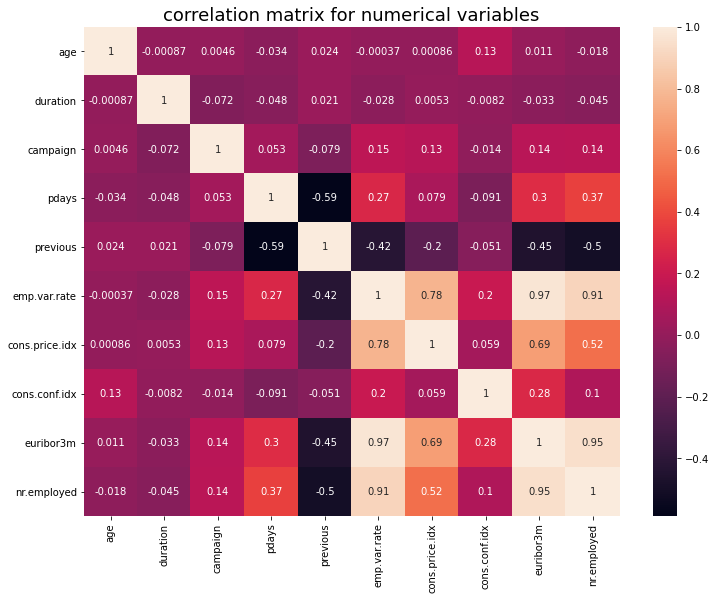

In [13]:
corrmat = bank_df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True,)
plt.title('correlation matrix for numerical variables',fontsize=18)

### Handle highly correlated variables

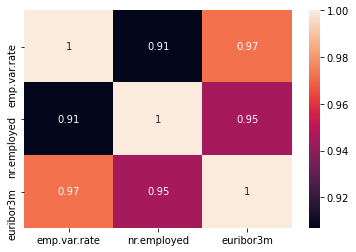

In [14]:
sns.heatmap(bank_df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True)
plt.show()

Positive high correlation between:

Euribor is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as “the price of money”.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor'.

In [15]:
bank_df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [16]:
bank_df.shape

(41188, 19)

In [17]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,yes


In [18]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'target'],
      dtype='object')

### Handling NAN and Unknown values

In [19]:
bank_df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

As we can see 39673 values are 999 that shows client was not previously contacted,this can add bias to our model hence converting this column to categorical column. other values 3-27 are low in number.

In [20]:
bank_df['pdays'] = bank_df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [21]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,no


In [22]:
bank_df.pdays.value_counts()

0     39673
20     1311
6       196
3         8
Name: pdays, dtype: int64

### separating categorical variable

In [23]:
var_categorical=bank_df.select_dtypes(include=['object'])

In [24]:
var_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,target
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### separating numerical value

In [25]:
var_numerical=bank_df.select_dtypes(exclude=['object'])

In [26]:
var_numerical

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,0,0,93.994,-36.4,4.857
1,57,149,1,0,0,93.994,-36.4,4.857
2,37,226,1,0,0,93.994,-36.4,4.857
3,40,151,1,0,0,93.994,-36.4,4.857
4,56,307,1,0,0,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,94.767,-50.8,1.028
41184,46,383,1,0,0,94.767,-50.8,1.028
41185,56,189,2,0,0,94.767,-50.8,1.028
41186,44,442,1,0,0,94.767,-50.8,1.028


In [27]:
cols = bank_df.columns

In [28]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)   

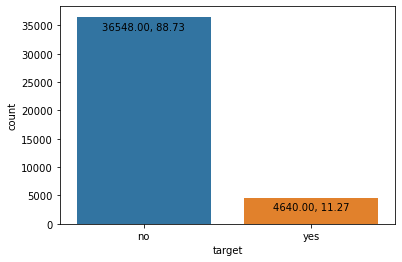

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.countplot(x = bank_df["target"]) 
label_values(ax, spacing=-15)
plt.show()

Job


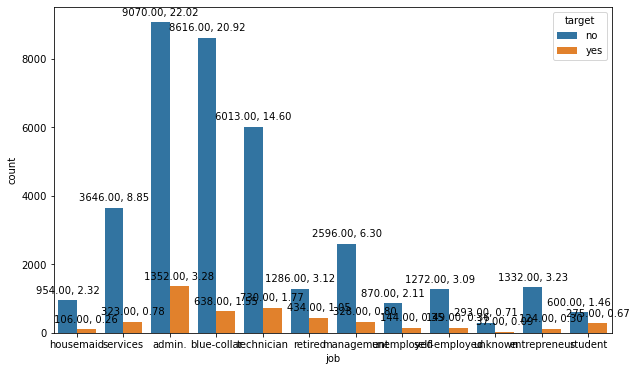

Marital


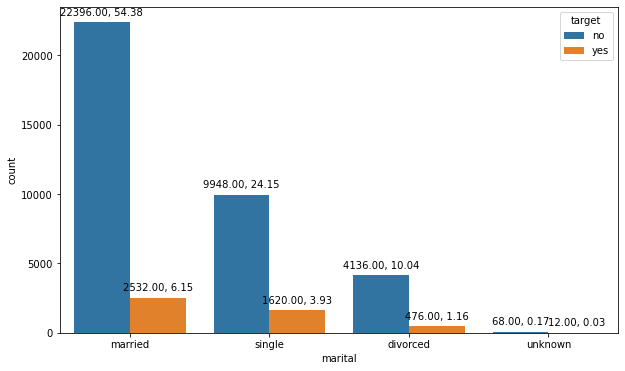

Education


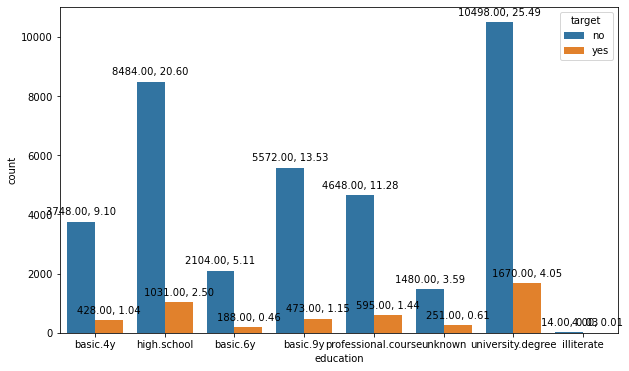

Default


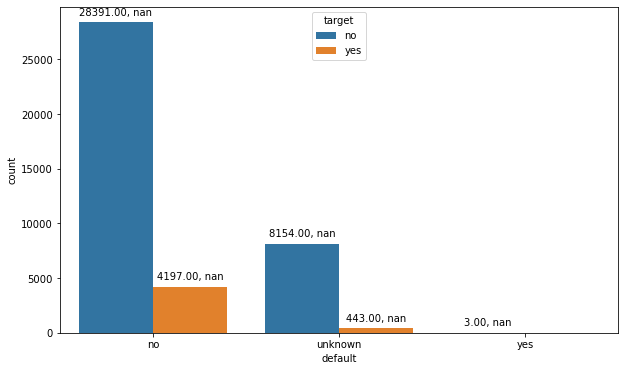

Housing


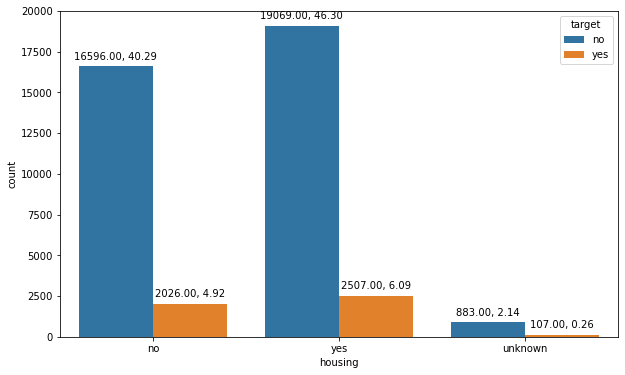

Loan


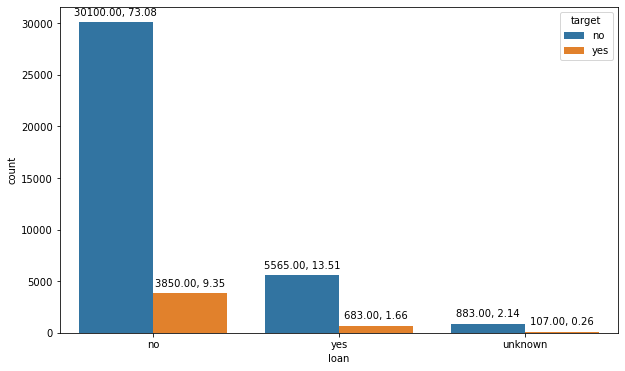

Contact


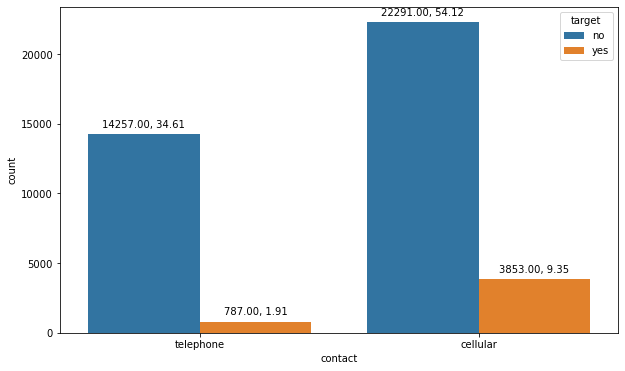

Month


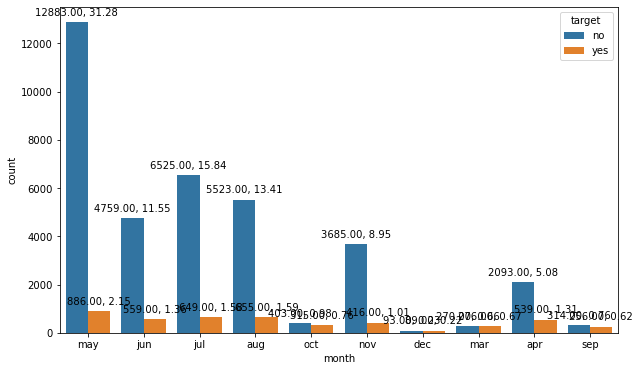

Day_Of_Week


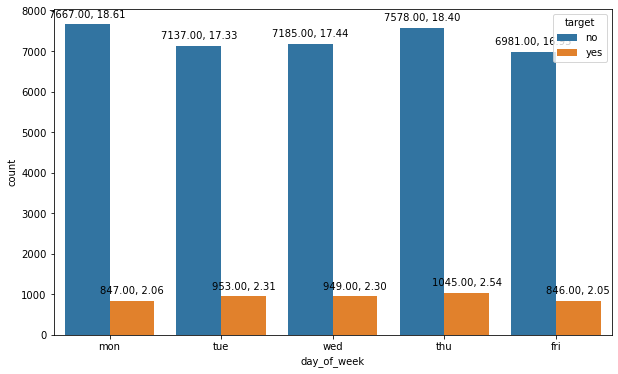

Poutcome


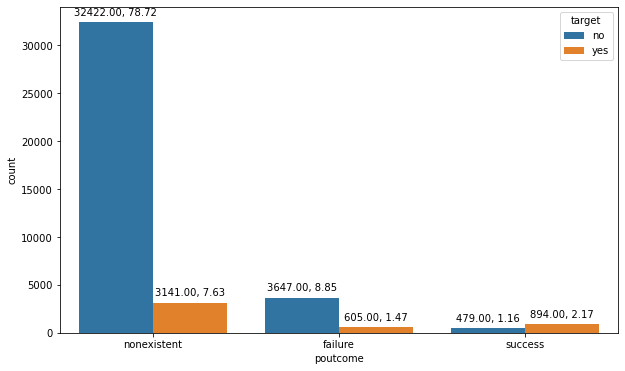

Target


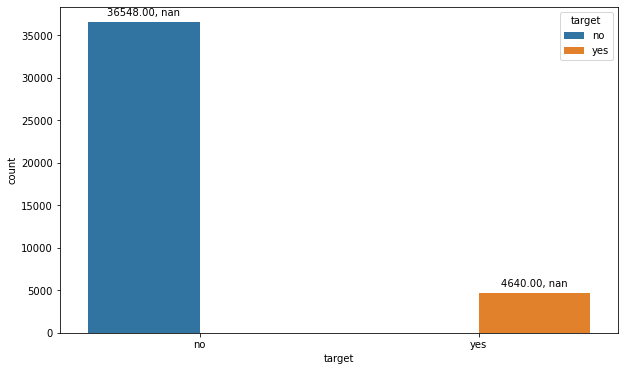

In [30]:
for column in var_categorical:
    plt.figure(figsize=(10, 6))
    print(column.title())
    ax = sns.countplot(x = bank_df[column], hue=bank_df["target"])
    label_values(ax)
    plt.show()

Job : Highest Number of application are from admin type of job.

Marital: most of the clients approached were married.

Education: Client with university degree and high school were approached more as compare to other and they have higher success rate compaired to others.
default: it doesn't shows much impact.

Housing: Housing loan does not have much effect on the number of term deposit purchased.

Loan: most of client with not having personal loan were approched most.

Contact: Around 64% calls are from cellular.

Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August.

day_of_week : We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed. So we will drop this feature.

poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [31]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,1.028,yes


In [32]:
var_categorical = bank_df.drop('target',axis=1)
var_categorical.shape

(41188, 18)

In [33]:
var_categorical.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [34]:
#creating test data set 
df_test=bank_df.target.astype(dtype='bool')

In [35]:
df_test.shape

(41188,)

In [36]:
df_test.dtype

dtype('bool')

### One Hot Encoding for categorical variables

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [58]:
# variables for contact, poutcome , job, month, marital,  education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 

bank_df['job'] = bank_df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
bank_df['housing'] = bank_df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank_df['marital'] = bank_df['marital'].apply(lambda x: 0 if x=='single' else (1 if x=='married' else (2 if x=='divorced' else -1)))
bank_df['loan'] = bank_df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank_df['target'] = bank_df['target'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank_df['poutcome'] = bank_df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))

bank_df  = pd.get_dummies(bank_df, drop_first = True)

In [59]:
bank_df

,age,marital,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,-1,-1,-1,261,1,0,0,-1,93.994,...,0,0,1,0,0,0,1,0,0,0
1,57,-1,-1,-1,149,1,0,0,-1,93.994,...,0,0,1,0,0,0,1,0,0,0
2,37,-1,-1,-1,226,1,0,0,-1,93.994,...,0,0,1,0,0,0,1,0,0,0
3,40,-1,-1,-1,151,1,0,0,-1,93.994,...,0,0,1,0,0,0,1,0,0,0
4,56,-1,-1,-1,307,1,0,0,-1,93.994,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1,-1,-1,334,1,0,0,-1,94.767,...,0,0,0,1,0,0,0,0,0,0
41184,46,-1,-1,-1,383,1,0,0,-1,94.767,...,0,0,0,1,0,0,0,0,0,0
41185,56,-1,-1,-1,189,2,0,0,-1,94.767,...,0,0,0,1,0,0,0,0,0,0
41186,44,-1,-1,-1,442,1,0,0,-1,94.767,...,0,0,0,1,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var_numerical=pd.DataFrame(scaler.fit_transform(var_numerical),columns=var_numerical.columns)

In [61]:
var_numerical

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,0.010471,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
1,1.628993,-0.421501,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
2,-0.290186,-0.124520,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
3,-0.002309,-0.413787,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
4,1.533034,0.187888,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41184,0.573445,0.481012,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41185,1.533034,-0.267225,-0.204909,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41186,0.381527,0.708569,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186


In [62]:
df_train = pd.concat([var_numerical, bank_df], axis=1,sort=False)
df_train

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,age,marital,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,0.010471,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,56,-1,...,0,0,1,0,0,0,1,0,0,0
1,1.628993,-0.421501,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,57,-1,...,0,0,1,0,0,0,1,0,0,0
2,-0.290186,-0.124520,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,37,-1,...,0,0,1,0,0,0,1,0,0,0
3,-0.002309,-0.413787,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,40,-1,...,0,0,1,0,0,0,1,0,0,0
4,1.533034,0.187888,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,56,-1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,73,-1,...,0,0,0,1,0,0,0,0,0,0
41184,0.573445,0.481012,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,46,-1,...,0,0,0,1,0,0,0,0,0,0
41185,1.533034,-0.267225,-0.204909,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,56,-1,...,0,0,0,1,0,0,0,0,0,0
41186,0.381527,0.708569,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,44,-1,...,0,0,0,1,0,0,0,0,0,0


## Reviewed by Kashish and Amir

### Key Points:

from corelation on dataset she found out positive corelated values which needs to be removed from data. 

while handling unknown and NAN values she found out 'pdays' has 39673 values are 999 that shows client was not previously contacted,this can add bias to our model hence converting this column to categorical column. other values 3-27 are low in number. so decided to use one hot encoding on "pdays" and converted into numerical value.

she decided to keep unknown values as to use minskowski error which reduces impacts of outliers on model and used one hot encoding on categorical variable convert it into numerical value. 

she identified the variable that has predictive power using weight of evidence and information value.